In [3]:
#Import basic libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('paper')

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff 

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_ = "drive/My Drive/BDML CLASS/week 6/creditcardclients.csv"


In [6]:
df = pd.read_csv(file_)

In [7]:
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

In [11]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

In [12]:
df = df.rename(columns={'default.payment.next.month': 'default', 
                        'PAY_0': 'PAY_1'})

In [13]:
marriage_count = df['MARRIAGE'].value_counts().reset_index().rename(columns={'index':'index','MARRIAGE':'count'})

In [14]:
fig = go.Figure(go.Bar(
    x = marriage_count['index'],y = marriage_count['count'],text=marriage_count['count'],marker={'color': marriage_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of marriage',xaxis_title="Marriage status",yaxis_title="Number of count")
fig.show()

In [15]:
edu_count = df['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})


In [16]:
edu_count['index'][0] = 'University'
edu_count['index'][1] = 'Graduate School'
edu_count['index'][2] = 'High school'
edu_count['index'][3] = 'Unknown 1'
edu_count['index'][4] = 'Others'
edu_count['index'][5] = 'Unknown 2'
edu_count['index'][6] = 'Unknown 3'

In [17]:
fig = go.Figure(go.Bar(
    x = edu_count['index'],y = edu_count['count'],text = edu_count['count'],marker={'color': edu_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of education',xaxis_title="Education status",yaxis_title="Number of count")
fig.show()

In [18]:
sex_count = df['SEX'].value_counts().reset_index().rename(columns={'index':'index','SEX':'count'})

In [19]:
sex_count['index'][1] = 'Male'
sex_count['index'][0] = 'Female'

In [20]:
fig = go.Figure(go.Bar(
    x = sex_count['index'],y = sex_count['count'],text=sex_count['count'],marker={'color': sex_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of gender',xaxis_title="Gender",yaxis_title="Number of count")
fig.show()


In [21]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [22]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=bills.columns.to_list())  

fig.add_trace(go.Histogram(x= df["BILL_AMT1"],name='BILL_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT2"],name='BILL_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT3"],name='BILL_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT4"],name='BILL_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT5"],name='BILL_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT6"],name='BILL_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Bill Amount")
fig.show()

In [23]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [24]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_AMT1"],name='PAY_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT2"],name='PAY_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT3"],name='PAY_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT4"],name='PAY_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT5"],name='PAY_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT6"],name='PAY_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Amount of Previous Payment")
fig.show()

In [25]:
import matplotlib as mpl
print(mpl.__version__)

3.2.2


In [26]:
defaulters = df.copy()
print(defaulters.shape)
defaulters.head()

(30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

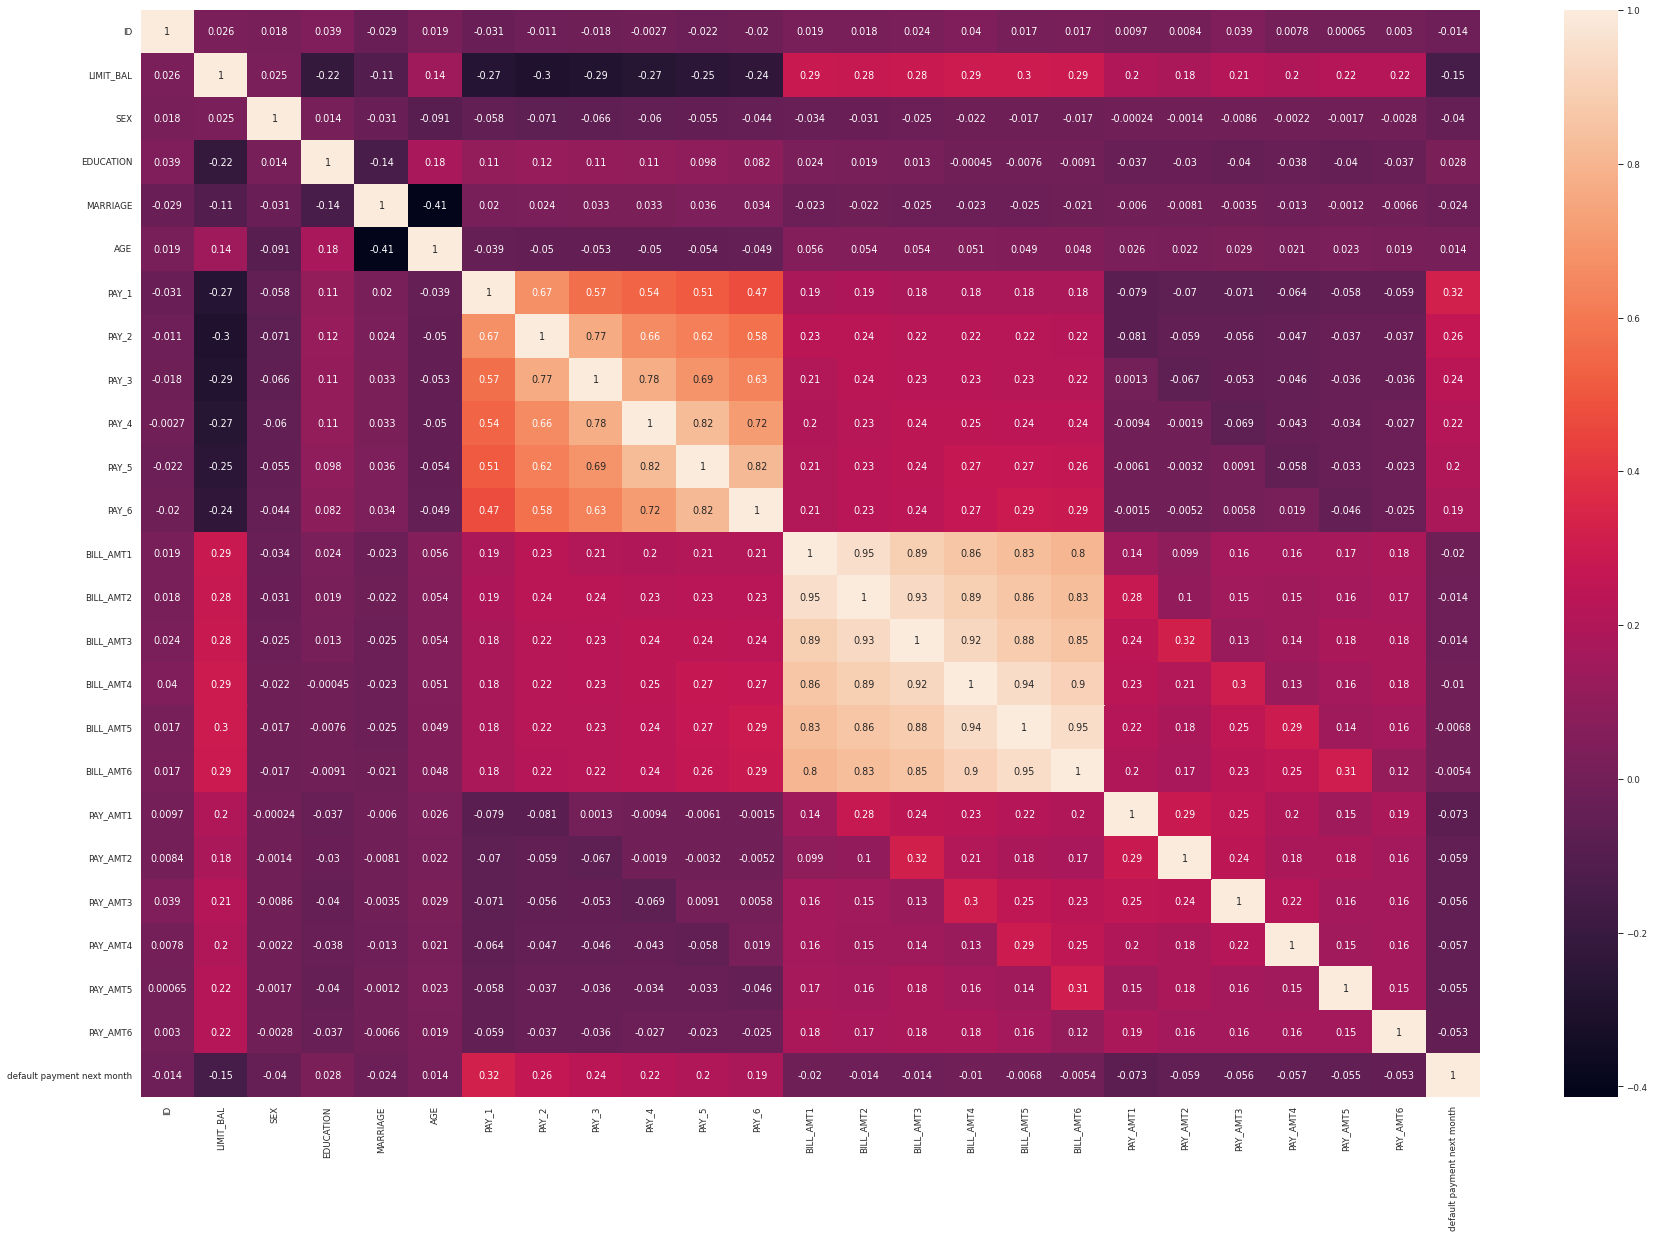

In [27]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

In [28]:
pay_s = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [29]:
df['PAY_1'].value_counts().index.to_list().sort()

In [30]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_1"],name='PAY_1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Previous Payment Status")
fig.show()

In [31]:
fig =  go.Figure(data=[go.Histogram(x= df["AGE"])])
fig.update_layout(title_text='Distribution of Age',xaxis_title="Age", title_x=0.5, yaxis_title="Frequency")
fig.show()


In [32]:
fig =  go.Figure(data=[go.Histogram(x= df["LIMIT_BAL"])])
fig.update_layout(title_text='Distribution of Credit Limit',xaxis_title="Credit Amount", title_x=0.5, yaxis_title="Frequency")
fig.show()


In [33]:
df = df.rename(columns={'default payment next month': 'default', 
                        'PAY_0': 'PAY_1'})

In [34]:
target_count = df['default'].value_counts().reset_index().rename(columns={'index':'index','default':'count'})
fig = go.Figure(go.Bar(
    x = target_count['index'],y = target_count['count'],text=target_count['count'],marker={'color': target_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of defaulter',xaxis_title="Status of Defaulting",yaxis_title="Number of count")
fig.show()


In [35]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()    

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [36]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [37]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [38]:
#Histogram after clubbing "-2" and "-1" to "0" label
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_1"],name='PAY_1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Previous Payment Status (After clubbing)")
fig.show()

In [40]:
#let's do bivariate analysis of all the features with the target variable:
#To do that let's define a function which gives out a cross tab and visualization:
def cross(Col1, Col2):
    res = pd.crosstab(df[Col1], df[Col2])
    #Calculating the percentage of defaulters
    res['Percentage'] = round((res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]])) * 100,2)
    print(res)
    #Plotting a stack bar graph
    fig = go.Figure(data=[
    go.Bar(name='Non-Defaulters', x=res.index.to_list(),y=res[0]),
    go.Bar(name='Defaulters', x=res.index.to_list(), y=res[1],text=(res['Percentage']),textposition = "outside")])
    # Change the bar mode to stack
    fig.update_layout(barmode='stack',title_text = res.index.name + " variable v/s target" ,xaxis_title=res.index.name,yaxis_title="Number of count")
    fig.show()

#Gender v/s Defaulters:

In [41]:
cross("SEX","default")

default      0     1  Percentage
SEX                             
1         9015  2873       24.17
2        14349  3763       20.78


In [42]:
cross("EDUCATION","default")

default        0     1  Percentage
EDUCATION                         
1           8549  2036       19.23
2          10700  3330       23.73
3           3680  1237       25.16
4            435    33        7.05


In [43]:
X = df.drop(['default','ID'], axis=1)  
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [44]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))


Accuracy: 0.7787777777777778

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.50      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.64      0.50      0.44      9000
weighted avg       0.72      0.78      0.68      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


#Feature engineering

In [45]:
df[['SEX','MARRIAGE','EDUCATION']] = df[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding
df = pd.get_dummies(df)
df.head()

ID  LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   1      20000   24      2      2      0      0      0      0       3913   
1   2     120000   26      0      2      0      0      0      2       2682   
2   3      90000   34      0      0      0      0      0      0      29239   
3   4      50000   37      0      0      0      0      0      0      46990   
4   5      50000   57      0      0      0      0      0      0       8617   

   BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       3102        689          0          0          0         0       689   
1       1725       2682       3272       3455       3261         0      1000   
2      14027      13559      14331      14948      15549      1518      1500   
3      48233      49291      28314      28959      29547      2000      2019   
4       5670      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  SEX_1  SEX_2  EDUCATION_1  \
0         0         0         0         0        1      0      1            0   
1      1000      1000         0      2000        1      0      1            0   
2      1000      1000      1000      5000        0      0      1            0   
3      1200      1100      1069      1000        0      0      1            0   
4     10000      9000       689       679        0      1      0            0   

   EDUCATION_2  EDUCATION_3  EDUCATION_4  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0            1            0            0           1           0           0  
1            1            0            0           0           1           0  
2            1            0            0           0           1           0  
3            1            0            0           1           0           0  
4            1            0            0           1           0           0

In [46]:
X = df.drop(['default','ID'], axis=1)  
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [47]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [48]:
# Separate majority and minority classes
df_majority = df_train[df_train.default == 0]
df_minority = df_train[df_train.default == 1]

print(df_majority.default.count())
print("-----------")
print(df_minority.default.count())
print("-----------")
print(df_train.default.value_counts())

16355
-----------
4645
-----------
0    16355
1     4645
Name: default, dtype: int64


#Random Oversampling

In [49]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 16355,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default.value_counts()

1    16355
0    16355
Name: default, dtype: int64

#B) Random Undersampling:

In [50]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4645,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default.value_counts()

1    4645
0    4645
Name: default, dtype: int64

#SMOTE: Synthetic Minority Oversampling Technique

In [54]:
sm = SMOTE(random_state=42)
X_train=pd.DataFrame(X_train)

X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_train, y_train)
X_SMOTE_temp, y_SMOTE_temp = sm.fit_resample(X_train, y_train)
X_SMOTE=pd.DataFrame(X_SMOTE_temp,columns=X_train.columns)
y_SMOTE=pd.DataFrame(y_SMOTE_temp)
print(type(X_SMOTE))
print(type(y_SMOTE))
print(type(X_SMOTE_temp))
print(type(y_SMOTE_temp))
print(type(y_train))
print(len(y_SMOTE))
print(y_SMOTE.sum())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
32710
0    16355
dtype: int64


In [55]:
sm = SMOTE(random_state=42)
X_SMOTE_temp, y_SMOTE_temp = sm.fit_resample(X_train, y_train)
X_SMOTE=pd.DataFrame(X_SMOTE_temp,columns=X_train.columns)
#y_SMOTE=pd.DataFrame.from_records(y_SMOTE_temp)
print(type(X_SMOTE))
print(type(y_SMOTE))
print(type(X_SMOTE_temp))
print(type(y_SMOTE_temp))
print(len(y_SMOTE))
print(type(y_train))
print(y_SMOTE.sum())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
32710
<class 'pandas.core.series.Series'>
0    16355
dtype: int64


In [70]:
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()


#i) Logistic Regression

In [167]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, 15)}
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(i,j)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
____________________________________________________________________________________________________


In [168]:
param_log =[{'C': 3.727593720314938},{'C': 11787686.347935867},{'C': 0.05179474679231213},{'C': 31.622776601683793}]

Data is  Normal Sampling  And with hyper parameter  {'C': 3.727593720314938}
Overall Train Accuracy 0.7783333333333333
Train AUC Score 0.6565544355442469
Overall Test Accuracy 0.7786666666666666
Test AUC Score 0.6435282426218311
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.33      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.56      0.50      0.44      9000
weighted avg       0.68      0.78      0.68      9000

K-Fold scores: 0.500 (+/- 0.00000)


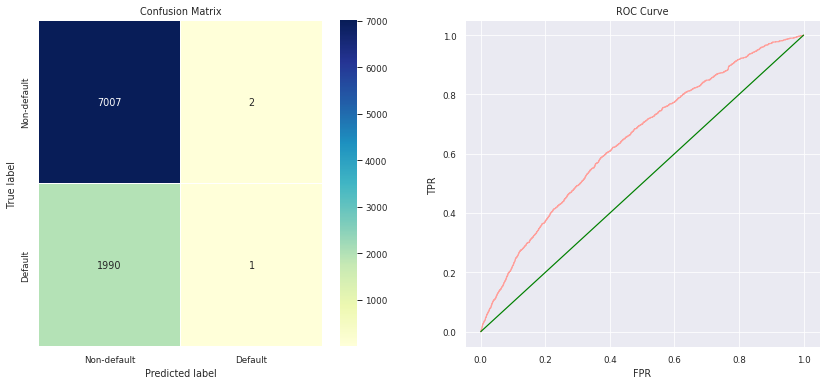

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'C': 11787686.347935867}
Overall Train Accuracy 0.6112503821461327
Train AUC Score 0.6523217035357267
Overall Test Accuracy 0.554
Test AUC Score 0.6462277208488276
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.51      0.64      7009
           1       0.29      0.71      0.41      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.53      9000
weighted avg       0.73      0.55      0.59      9000

K-Fold scores: 0.614 (+/- 0.00001)


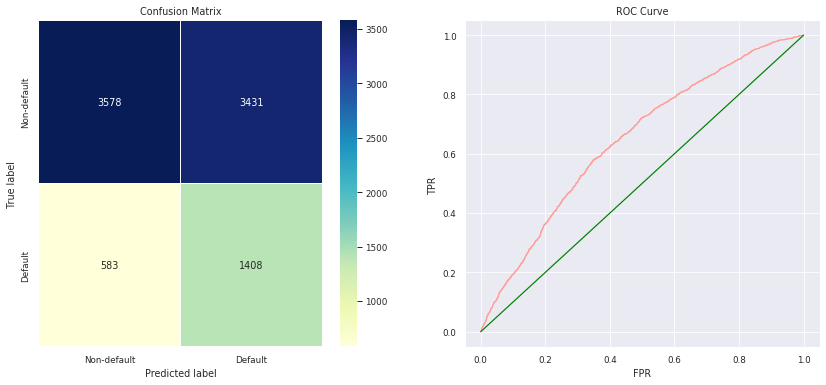

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'C': 0.05179474679231213}
Overall Train Accuracy 0.6187298170075349
Train AUC Score 0.6609158776929485
Overall Test Accuracy 0.5505555555555556
Test AUC Score 0.6487807990859711
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.50      0.64      7009
           1       0.29      0.72      0.41      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.59      9000

K-Fold scores: 0.615 (+/- 0.00009)


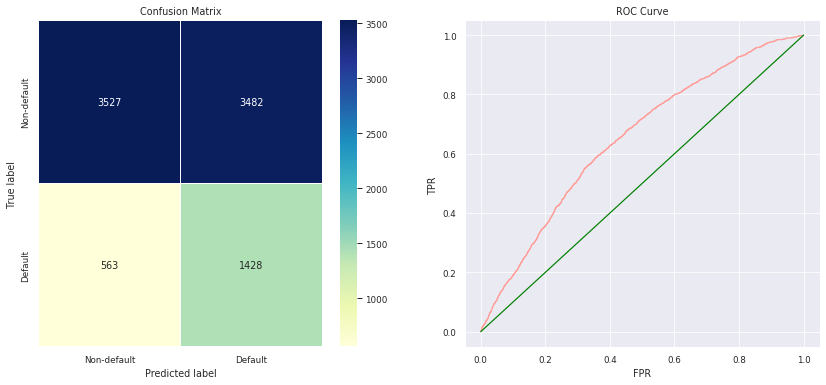

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'C': 31.622776601683793}
Overall Train Accuracy 0.5894833384286151
Train AUC Score 0.6571899316983009
Overall Test Accuracy 0.6905555555555556
Test AUC Score 0.6418259754857767
Classification Report of Test
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      7009
           1       0.33      0.37      0.35      1991

    accuracy                           0.69      9000
   macro avg       0.57      0.58      0.57      9000
weighted avg       0.71      0.69      0.70      9000

K-Fold scores: 0.608 (+/- 0.00037)


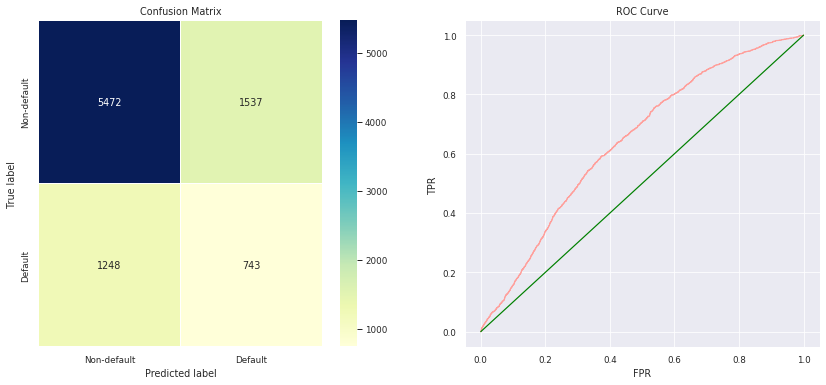

____________________________________________________________


In [169]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(LogisticRegression(**param_log[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

#ii) Naive bayes:

Data is  Normal Sampling
Overall Train Accuracy 0.765095238095238
Train AUC Score 0.7472296421006075
Overall Test Accuracy 0.7558888888888889
Test AUC Score 0.7358834902588829
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7009
           1       0.46      0.54      0.50      1991

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.76      0.76      9000

K-Fold scores: 0.698 (+/- 0.00003)


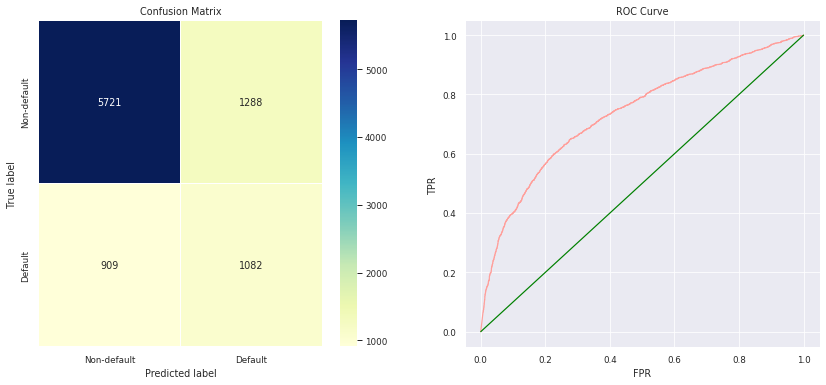

____________________________________________________________
Data is  Over Sampling
Overall Train Accuracy 0.6991745643534087
Train AUC Score 0.7461003448684843
Overall Test Accuracy 0.7514444444444445
Test AUC Score 0.7367858244107329
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.81      0.83      7009
           1       0.45      0.56      0.50      1991

    accuracy                           0.75      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.75      0.76      9000

K-Fold scores: 0.700 (+/- 0.00001)


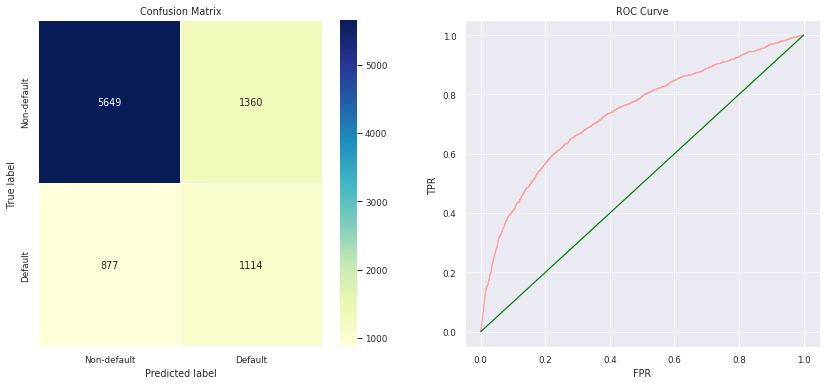

____________________________________________________________
Data is  Under Sampling
Overall Train Accuracy 0.7036598493003229
Train AUC Score 0.7496985890589207
Overall Test Accuracy 0.7393333333333333
Test AUC Score 0.7404739862696446
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      7009
           1       0.43      0.59      0.50      1991

    accuracy                           0.74      9000
   macro avg       0.65      0.69      0.66      9000
weighted avg       0.77      0.74      0.75      9000

K-Fold scores: 0.703 (+/- 0.00014)


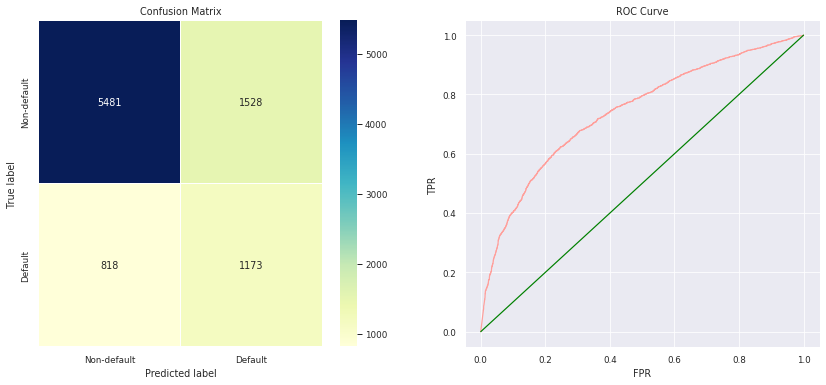

____________________________________________________________
Data is  SMOTE
Overall Train Accuracy 0.6584836441455213
Train AUC Score 0.786123987225127
Overall Test Accuracy 0.5082222222222222
Test AUC Score 0.7220498019372237
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.43      0.57      7009
           1       0.28      0.80      0.42      1991

    accuracy                           0.51      9000
   macro avg       0.58      0.61      0.50      9000
weighted avg       0.75      0.51      0.54      9000

K-Fold scores: 0.661 (+/- 0.00031)


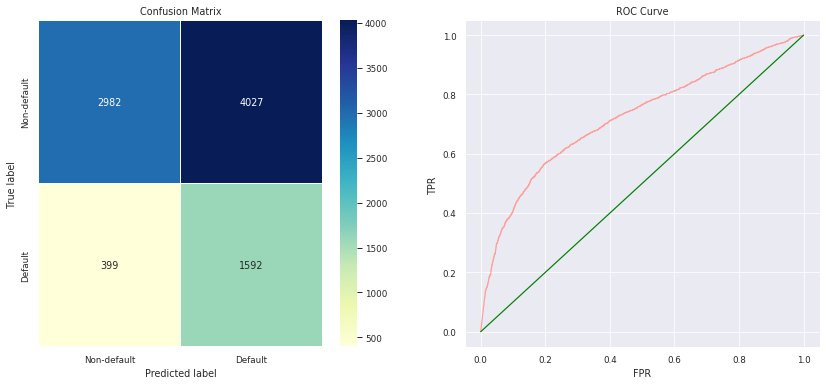

____________________________________________________________


In [170]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    b = ss.transform(X_test)
    model_eval(GaussianNB(), xts,j,b,y_test)
    print("_" * 60)

#iii) K-Nearest Neighbours:

In [171]:
# xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
# ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
# name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

# for i,j,k in zip(xtrain_data,ytrain_data,name):
#     global best_xgb
#     ss = StandardScaler()
#     a = ss.fit_transform(i)
#     xts = pd.DataFrame(a,columns = i.columns)
#     best_knn = []
#     print('Data is ',k) # Instantiate a KNN classifier: tree
#     knn = KNeighborsClassifier()
#     # Setup the parameters and distributions to sample from: param_dist
#     params = {'n_neighbors' : sp_randint(1,20),
#              'p': sp_randint(1,5)}
#     rsearch_knn = RandomizedSearchCV(knn, param_distributions = params, cv = 3, random_state = 3 , n_iter = 50,n_jobs = -1)
#     rsearch_knn.fit(xts,j)
#     best_knn.append(rsearch_knn.best_params_)
#     print("Tuned KNN Parameters: {}".format(rsearch_knn.best_params_), "for",k)
#     print("_" * 100)

In [172]:
param_knn = [{'n_neighbors': 17, 'p': 3},{'n_neighbors': 1, 'p': 4},{'n_neighbors': 19, 'p': 4},{'n_neighbors': 2, 'p': 1}]


In [173]:
# xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
# ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
# name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
# index = [0,1,2,3]

# for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
#     print('Data is ',k,' And with hyper parameter ',param_knn[l])
#     ss = StandardScaler()
#     a = ss.fit_transform(i)
#     xts = pd.DataFrame(a,columns = i.columns)
#     b = ss.transform(X_test)
#     model_eval(KNeighborsClassifier(**param_knn[l]), xts,j,b,y_test)
#     print("_" * 60)

#iv) Decision Tree

In [174]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(i,j)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",name)
    print("_" * 100)    


Data is  Normal Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 15} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 13} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Decision Tree Parameters: {'criterion': 'gin

In [67]:
param_dt = [{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32},
           {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15},
           {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28},
           {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}]


Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8266666666666667
Train AUC Score 0.7763312654935781
Overall Test Accuracy 0.8176666666666667
Test AUC Score 0.7439976899901749
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.658 (+/- 0.00003)


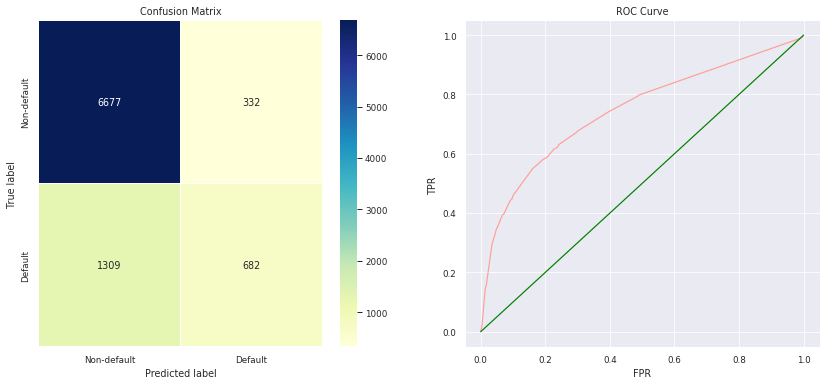

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.9077346377254663
Train AUC Score 0.9752067458477505
Overall Test Accuracy 0.7234444444444444
Test AUC Score 0.6671962051517462
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      7009
           1       0.40      0.51      0.45      1991

    accuracy                           0.72      9000
   macro avg       0.62      0.65      0.63      9000
weighted avg       0.75      0.72      0.73      9000

K-Fold scores: 0.804 (+/- 0.00006)


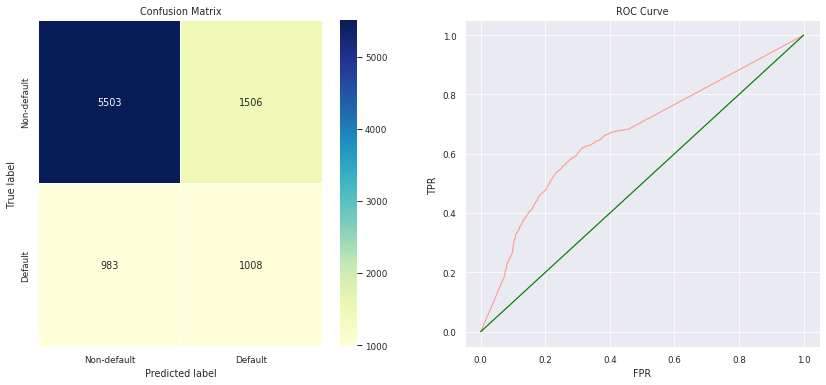

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.709903121636168
Train AUC Score 0.7635696334241364
Overall Test Accuracy 0.7834444444444445
Test AUC Score 0.7479756063077112
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7009
           1       0.51      0.54      0.52      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000

K-Fold scores: 0.699 (+/- 0.00010)


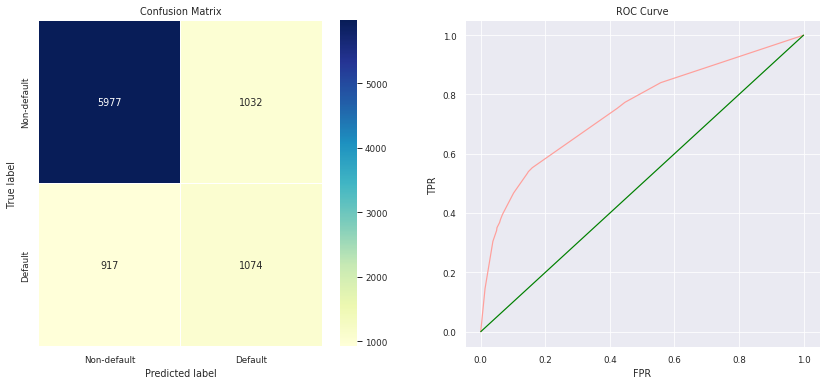

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8583002140018343
Train AUC Score 0.9290376796320481
Overall Test Accuracy 0.7885555555555556
Test AUC Score 0.7207856957105949
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      7009
           1       0.53      0.41      0.46      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.67      9000
weighted avg       0.77      0.79      0.78      9000

K-Fold scores: 0.828 (+/- 0.00002)


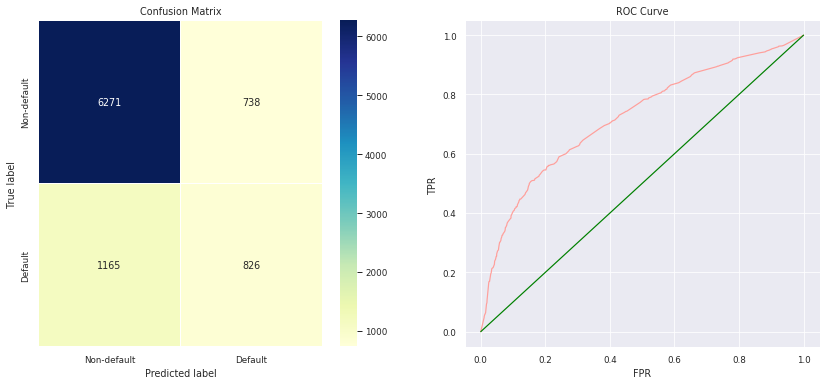

____________________________________________________________


In [176]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(DecisionTreeClassifier(**param_dt[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

#v) Random Forest

In [177]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',k)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 2, scoring = 'roc_auc',n_iter = 5,random_state = 42,n_jobs = -1,return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(i,j)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",k)
    print("_" * 60)


Data is  Normal Sampling
Tuned Random Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107} for Normal Sampling
____________________________________________________________
Data is  Over Sampling
Tuned Random Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107} for Over Sampling
____________________________________________________________
Data is  Under Sampling
Tuned Random Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 12, 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 64} for Under Sampling
____________________________________________________________
Data is  SMOTE
Tuned Random Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107} for SMOTE
_____________________________

In [178]:
param_rf = [{'criterion': 'entropy', 'max_depth': 9, 'max_features': 19, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 183},
           {'criterion': 'entropy', 'max_depth': 9, 'max_features': 22, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 162},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 14, 'min_samples_leaf': 16, 'min_samples_split': 15, 'n_estimators': 164},
           {'criterion': 'entropy', 'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 179}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.842
Train AUC Score 0.8452947667123322
Overall Test Accuracy 0.8171111111111111
Test AUC Score 0.7765993124001651
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.658 (+/- 0.00003)


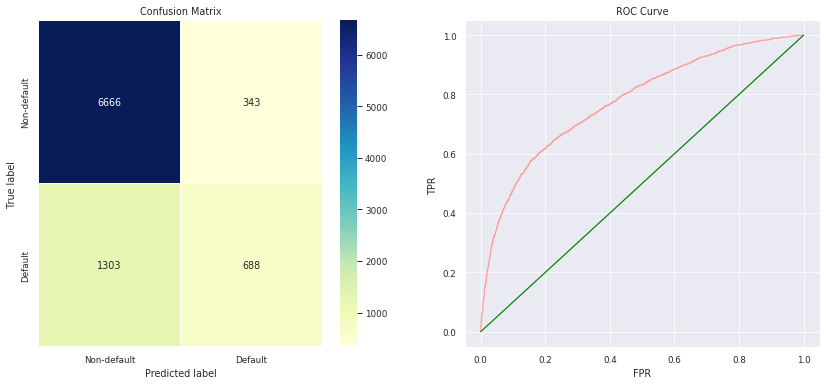

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.7723937633751147
Train AUC Score 0.8683389571473875
Overall Test Accuracy 0.787
Test AUC Score 0.7712617679830317
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7009
           1       0.52      0.55      0.53      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.70      0.70      9000
weighted avg       0.79      0.79      0.79      9000

K-Fold scores: 0.751 (+/- 0.00001)


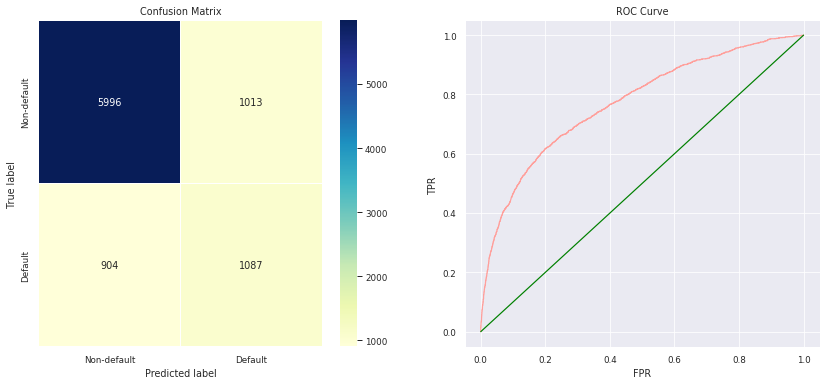

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.7564047362755651
Train AUC Score 0.8467957605722092
Overall Test Accuracy 0.7644444444444445
Test AUC Score 0.7760706457701403
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7009
           1       0.47      0.61      0.53      1991

    accuracy                           0.76      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.76      0.77      9000

K-Fold scores: 0.712 (+/- 0.00011)


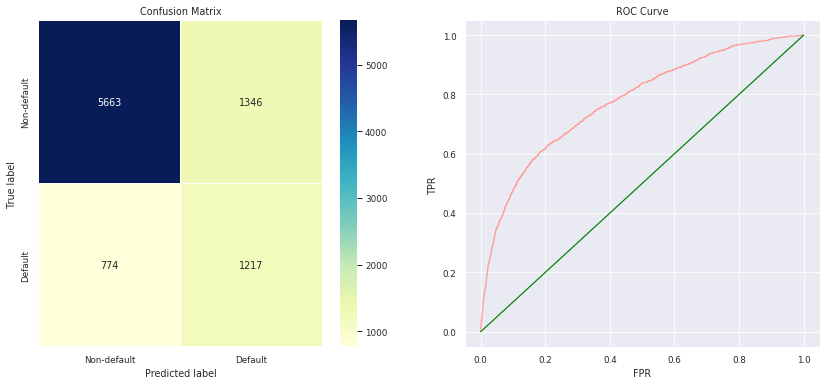

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8620911036380312
Train AUC Score 0.9375901993384513
Overall Test Accuracy 0.8102222222222222
Test AUC Score 0.769773583064151
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7009
           1       0.60      0.44      0.50      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.69      9000
weighted avg       0.80      0.81      0.80      9000

K-Fold scores: 0.850 (+/- 0.00001)


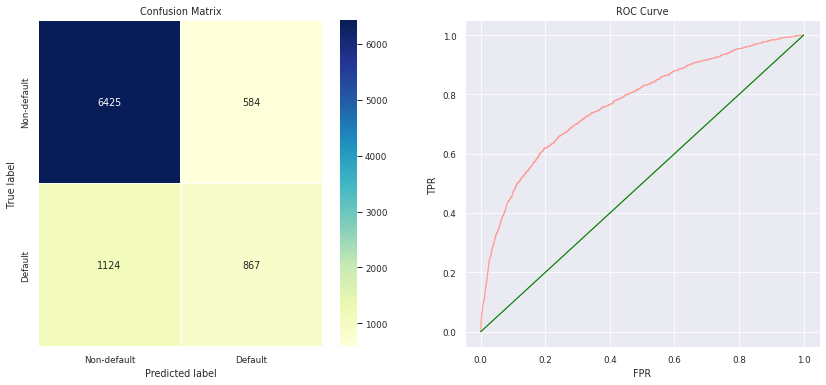

____________________________________________________________


In [179]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(RandomForestClassifier(**param_rf[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

#vi) AdaBoost Classifier

In [180]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_ada
    best_ada =[]
    print('Data is ',k)
    # Instantiate a Ada Boost classifier
    ada = AdaBoostClassifier()

    #Creating a grid of hyperparameters
    param_grid = {'n_estimators': [200,300],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV GridSearchCV object
    grid_ada = GridSearchCV(ada, param_grid, scoring = 'accuracy', cv=2,n_jobs = -1)

    #Fitting the grid to the training data
    grid_ada.fit(i,j)
    best_ada.append(grid_ada.best_params_)
    print("Tuned Ada Boost Parameters: {}".format(grid_ada.best_params_), "for",k)
    print("_" * 60)


Data is  Normal Sampling
Tuned Ada Boost Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300} for Normal Sampling
____________________________________________________________
Data is  Over Sampling
Tuned Ada Boost Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.75, 'n_estimators': 300} for Over Sampling
____________________________________________________________
Data is  Under Sampling
Tuned Ada Boost Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300} for Under Sampling
____________________________________________________________
Data is  SMOTE
Tuned Ada Boost Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300} for SMOTE
____________________________________________________________


In [181]:
param_ada = [{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300},
            {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300},
            {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200},
            {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8211428571428572
Train AUC Score 0.7800456962858852
Overall Test Accuracy 0.8164444444444444
Test AUC Score 0.7677436178597669
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.655 (+/- 0.00002)


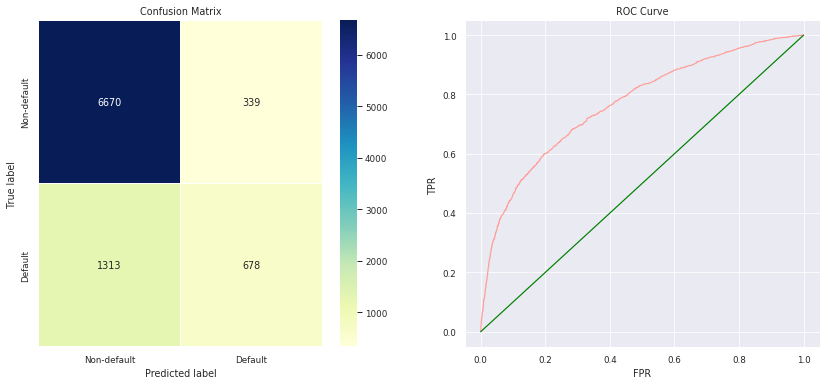

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.7278508101498012
Train AUC Score 0.8068288633022979
Overall Test Accuracy 0.7577777777777778
Test AUC Score 0.7648981337691748
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      7009
           1       0.46      0.59      0.52      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.78      0.76      0.77      9000

K-Fold scores: 0.718 (+/- 0.00001)


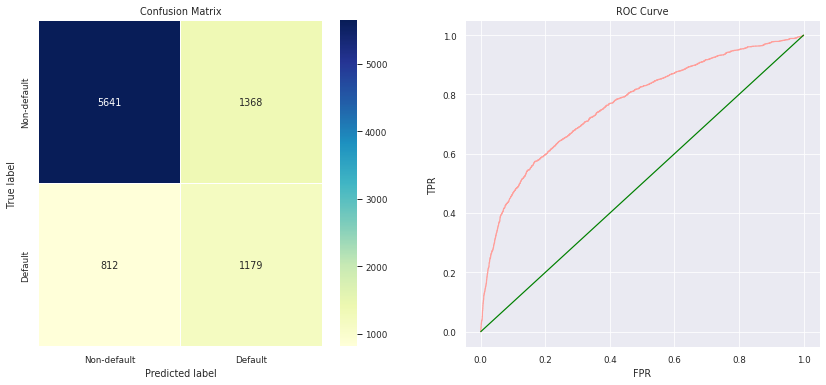

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.7222820236813778
Train AUC Score 0.7991749870516001
Overall Test Accuracy 0.7591111111111111
Test AUC Score 0.7692095883895851
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      7009
           1       0.47      0.61      0.53      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.76      0.77      9000

K-Fold scores: 0.708 (+/- 0.00010)


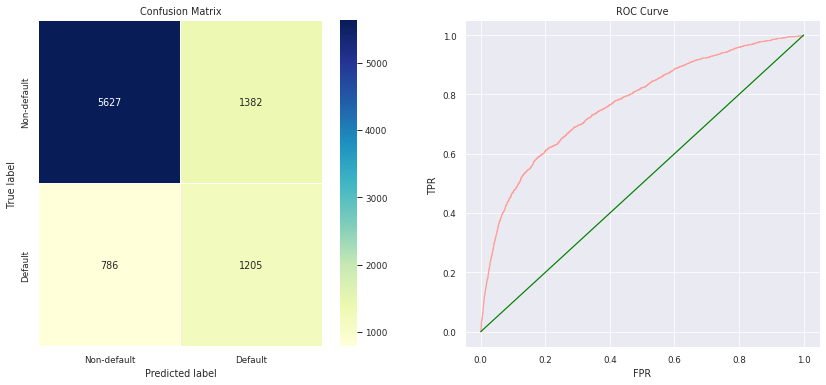

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8620605319474167
Train AUC Score 0.9247582055922361
Overall Test Accuracy 0.8136666666666666
Test AUC Score 0.7645054765276675
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      7009
           1       0.63      0.39      0.48      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000

K-Fold scores: 0.860 (+/- 0.00002)


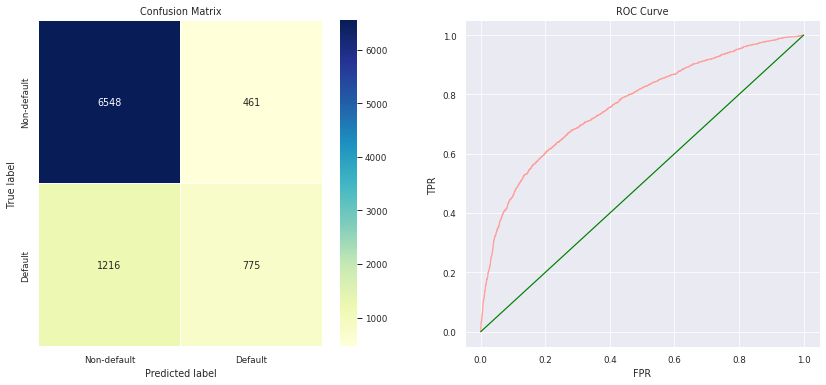

____________________________________________________________


In [182]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(AdaBoostClassifier(**param_ada[l]), i,j,X_test,y_test)
    print("_" * 60)

#vii) GradientBoosting Classifier

In [183]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_gbc
    best_gbc =[]
    print('Data is ',k)
    # Instantiate a Gradient Boost classifier
    gbc = GradientBoostingClassifier()

    #Creating a grid of hyperparameters
    param_grid = {'n_estimators': [200,300],
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV GridSearchCV object
    grid_gbc = GridSearchCV(gbc, param_grid, scoring = 'accuracy', cv=2,n_jobs = -1)

    #Fitting the grid to the training data
    grid_gbc.fit(i,j)
    best_gbc.append(grid_gbc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(grid_gbc.best_params_), "for",k)
    print("_" * 60)


Data is  Normal Sampling
Tuned Random Tree Parameters: {'learning_rate': 0.5, 'n_estimators': 200} for Normal Sampling
____________________________________________________________
Data is  Over Sampling
Tuned Random Tree Parameters: {'learning_rate': 0.75, 'n_estimators': 300} for Over Sampling
____________________________________________________________
Data is  Under Sampling
Tuned Random Tree Parameters: {'learning_rate': 0.75, 'n_estimators': 200} for Under Sampling
____________________________________________________________
Data is  SMOTE
Tuned Random Tree Parameters: {'learning_rate': 0.5, 'n_estimators': 200} for SMOTE
____________________________________________________________


In [187]:
param_gbc = [{'learning_rate': 0.5, 'n_estimators': 200},
            {'learning_rate': 1.0, 'n_estimators': 300},
            {'learning_rate': 0.5, 'n_estimators': 200},
            {'learning_rate': 0.5, 'n_estimators': 200}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8684761904761905
Train AUC Score 0.8970215538645874
Overall Test Accuracy 0.8052222222222222
Test AUC Score 0.7600251925503833
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.60      0.37      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

K-Fold scores: 0.654 (+/- 0.00004)


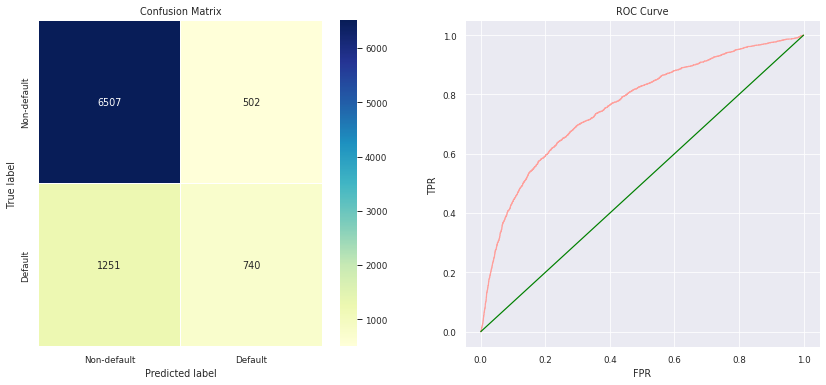

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.9003057169061449
Train AUC Score 0.9618269384353818
Overall Test Accuracy 0.7384444444444445
Test AUC Score 0.7185191114330367
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      7009
           1       0.43      0.53      0.48      1991

    accuracy                           0.74      9000
   macro avg       0.64      0.67      0.65      9000
weighted avg       0.76      0.74      0.75      9000

K-Fold scores: 0.830 (+/- 0.00005)


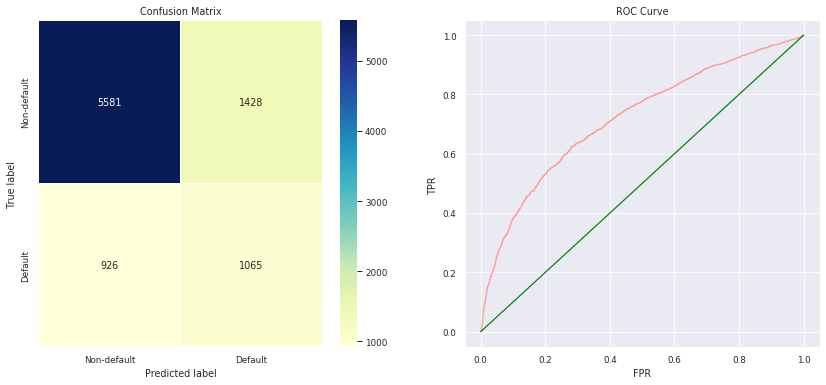

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.8558665231431647
Train AUC Score 0.9372954471456165
Overall Test Accuracy 0.6965555555555556
Test AUC Score 0.7426564425060439
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.71      0.79      7009
           1       0.39      0.64      0.48      1991

    accuracy                           0.70      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.70      0.72      9000

K-Fold scores: 0.685 (+/- 0.00017)


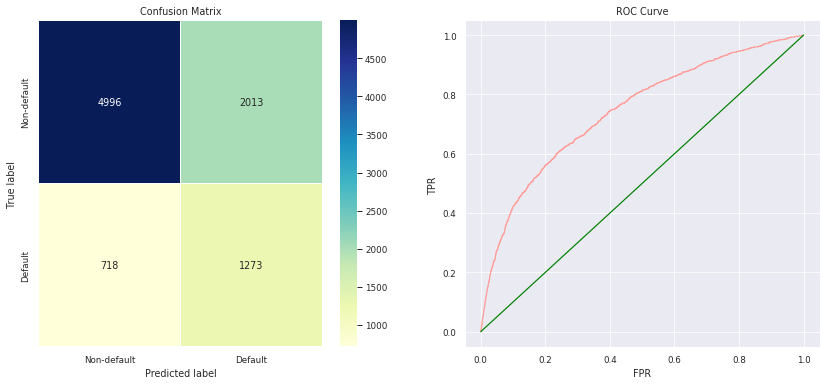

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8958116783858148
Train AUC Score 0.9605908271282585
Overall Test Accuracy 0.8036666666666666
Test AUC Score 0.7554291787720158
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      7009
           1       0.58      0.39      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000

K-Fold scores: 0.861 (+/- 0.00002)


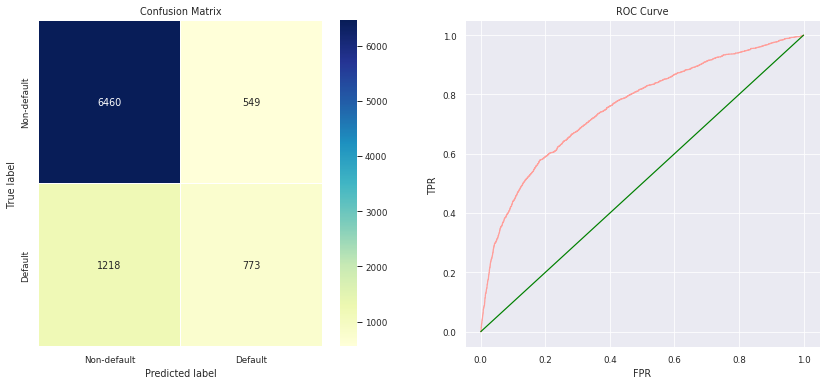

____________________________________________________________


In [188]:
for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(GradientBoostingClassifier(**param_gbc[l]), i,j,X_test,y_test)
    print("_" * 60)

#viii) XGBoost Classifier¶

In [59]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    best_xgb =[]
    print('Data is ',k)  # Instantiate a XGBoost classifier
    xgb= XGBClassifier()

    param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
                  "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight" : [1, 3, 5, 7],
                 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
                 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] }

    #Building a 5 fold CV GridSearchCV object
    xgb_RS = RandomizedSearchCV(xgb, param_grid ,cv = 2, scoring = 'roc_auc',n_iter = 5,n_jobs = -1)

    #Fitting the grid to the training data
    xgb_RS.fit(i,j)
    best_xgb.append(xgb_RS.best_params_)
    print("Tuned XG Boost Parameters: {}".format(xgb_RS.best_params_), "for",k)
    print("_" * 60)

Data is  Normal Sampling
Tuned XG Boost Parameters: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.5} for Normal Sampling
____________________________________________________________
Data is  Over Sampling
Tuned XG Boost Parameters: {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.5} for Over Sampling
____________________________________________________________
Data is  Under Sampling
Tuned XG Boost Parameters: {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.5} for Under Sampling
____________________________________________________________
Data is  SMOTE
Tuned XG Boost Parameters: {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4} for SMOTE
____________________________________________________________


In [60]:
param_xgb = [{'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05,
                            'gamma': 0.2, 'colsample_bytree': 0.5},
            {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25,
                            'gamma': 0.0, 'colsample_bytree': 0.3},
            {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05,
                            'gamma': 0.2, 'colsample_bytree': 0.4},
            {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1,
                            'gamma': 0.0, 'colsample_bytree': 0.4}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8318095238095238
Train AUC Score 0.8167430915054468
Overall Test Accuracy 0.8183333333333334
Test AUC Score 0.7808003041794797
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

K-Fold scores: 0.661 (+/- 0.00003)


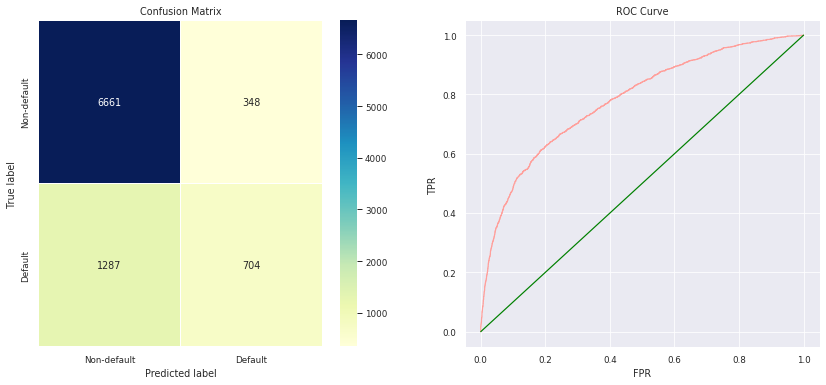

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.996453683888719
Train AUC Score 0.9999456139811417
Overall Test Accuracy 0.7963333333333333
Test AUC Score 0.7476071699162138
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      7009
           1       0.55      0.41      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.66      0.67      9000
weighted avg       0.78      0.80      0.79      9000

K-Fold scores: 0.931 (+/- 0.00001)


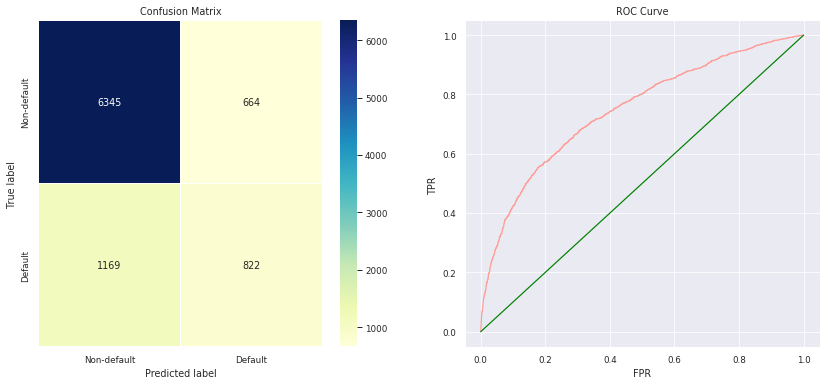

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.7332615715823466
Train AUC Score 0.8124578090728019
Overall Test Accuracy 0.7636666666666667
Test AUC Score 0.7795202179245899
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      7009
           1       0.47      0.62      0.54      1991

    accuracy                           0.76      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.76      0.77      9000

K-Fold scores: 0.715 (+/- 0.00006)


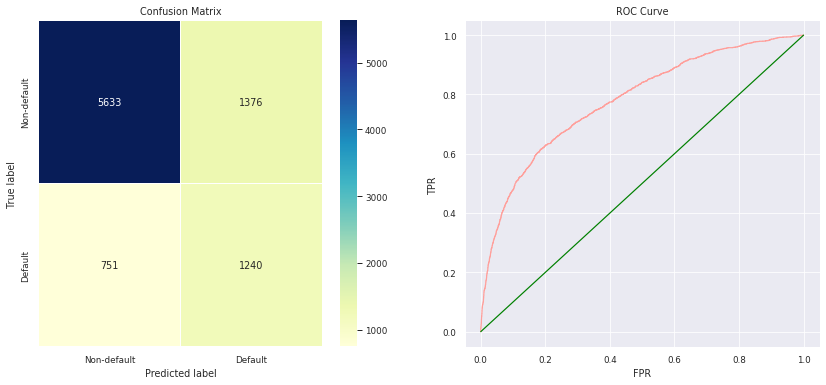

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.9973402629165393
Train AUC Score 0.9999740304189723
Overall Test Accuracy 0.7995555555555556
Test AUC Score 0.7541855671107801
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      7009
           1       0.57      0.40      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.66      0.67      9000
weighted avg       0.78      0.80      0.79      9000

K-Fold scores: 0.879 (+/- 0.00000)


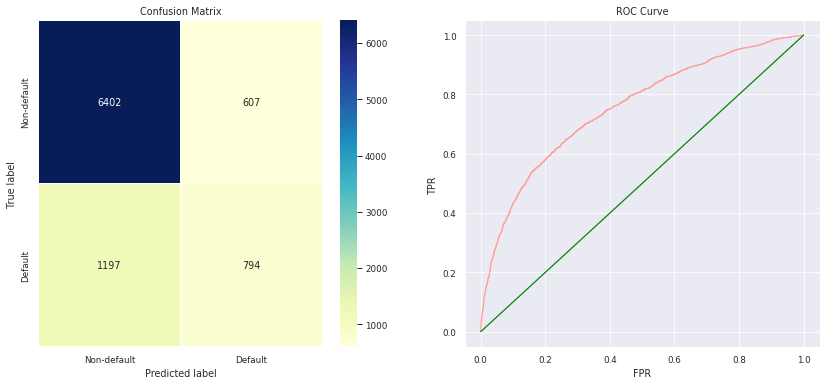

____________________________________________________________


In [71]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(XGBClassifier(**param_xgb[l]), i,j,X_test,y_test)
    print("_" * 60)

In [62]:
dic = {'Model':['XGboost','Random forest','Ada Boost','Gradient Boost','Decision Tree'],
       'Data':['SMOTE','SMOTE','SMOTE','SMOTE','Under Sampling'],
       'Accuracy':[0.76,0.81,0.81,0.80,0.78],
       'K-Fold score':[0.71,0.85,0.86,0.85,0.70],
       'AUC-ROC Score':[0.78,0.77,0.76,0.74,0.74]}
score_df = pd.DataFrame(dic)
fig =  ff.create_table(score_df)
fig.show()

In [63]:
def plot_Feature(feature, clf):
    tmp = pd.DataFrame({'Feature': feature, 
                        'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    fig = go.Figure(go.Bar(
    x=tmp['Feature'],y=tmp['Feature importance'],marker={'color': tmp['Feature importance'], 
    'colorscale': 'Viridis'}
    ))
    fig.update_layout(title_text='Feature Importance',xaxis_title="Feature",yaxis_title="Importance")
    return fig.show()

In [64]:
#BEST MODEL with BEST PARAMETERS
param_r = {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
rfc_s = RandomForestClassifier(**param_r,random_state = 42).fit(X_SMOTE,y_SMOTE)

In [65]:
plot_Feature(X_SMOTE.columns,rfc_s)